In [2]:
import numpy as np
import xbout
import xarray as xr
import matplotlib.pyplot as plt
import matplotlib as mpl
from mpl_toolkits.axes_grid1 import make_axes_locatable
import pandas as pd
import os, sys

sys.path.append(r"C:\Users\mikek\OneDrive\Project\python-packages\sdtools")
from hermes3.load import *
from hwtools import *
from hermes3.utils import create_norm

%load_ext autoreload
%autoreload 2

In [31]:
cases = [
    # {"N0" : 1e19, "T0" : 50},
    {"N0" : 1.334e17, "T0" : 40, "lambda_n" : 0.0012924*(1/0.2), "dy" : 120.897, "ny" : 64
     },
        
]

for case in cases:
    alpha, kappa = get_alpha_kappa(n0 = case["N0"], 
                                   T0 = case["T0"], 
                                   lambda_n = case["lambda_n"],
                                   dy = case["dy"],
                                   ny = case["ny"]
                                #    dyny = 12.8
        )
    

    # print(f"---- alpha: {alpha:.6f}, kappa: {kappa:.3f}")

# T0: 40
# n0: 1.334e+17
# B: 0.5
# Z: 1
# lambda_n: 0.006462
# dy: 120.897
# ny: 64
# rho_s0: 0.001292
# Lpar: 10.0000
# alpha: 2.54e+01
# alpha 2D: 1.00e+01
# kappa: 0.2000


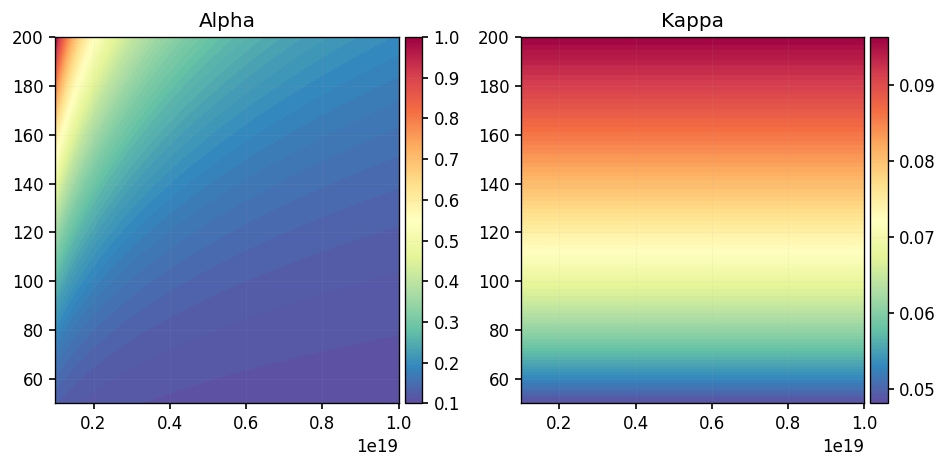

In [3]:
Trange = np.linspace(50,200,100)
Nrange = np.linspace(1e18,1e19, 100)

alpha = np.zeros((len(Trange), len(Nrange)))
kappa = np.zeros((len(Trange), len(Nrange)))

for Ti, T in enumerate(Trange):
    for Ni, N in enumerate(Nrange):
        alpha[Ti,Ni], kappa[Ti,Ni] = get_alpha_kappa(T0 = T, n0 = N, B = 0.5, Z = 1, lambda_n = 0.03)

vmin = alpha.min()
vmax = alpha.max()
cmap = "Spectral_r"
logscale = False

fig, axes = plt.subplots(1,2, figsize = (8,4))
norm1 = create_norm(logscale, None, 0.1, 1.0)
sm1 = mpl.cm.ScalarMappable(norm = norm1, cmap = cmap)

axes[0].contourf(Nrange, Trange, alpha, levels = 100, cmap = cmap, linestyles = "solid")

divider = make_axes_locatable(axes[0])
cax1 = divider.append_axes("right", size="5%", pad=0.05)
fig.colorbar(sm1, cax = cax1)


norm2 = create_norm(logscale, None, kappa.min(), kappa.max())
sm2 = mpl.cm.ScalarMappable(norm = norm2, cmap = cmap)

axes[1].contourf(Nrange, Trange, kappa, levels = 100, cmap = cmap, linestyles = "solid")
divider = make_axes_locatable(axes[1])
cax2 = divider.append_axes("right", size="5%", pad=0.05)
fig.colorbar(sm2, cax = cax2)

axes[0].set_title("Alpha")
axes[1].set_title("Kappa")
            
fig.tight_layout()

In [96]:
0.2*64

12.8

NameError: name 'get_alpha_kappa' is not defined

In [99]:
rho_s0 = 0.0012924200467782877
Lpar = 0.2 * 64 * rho_s0
ksq = (2*np.pi / Lpar)**2

print(Lpar)

0.016542976598762082


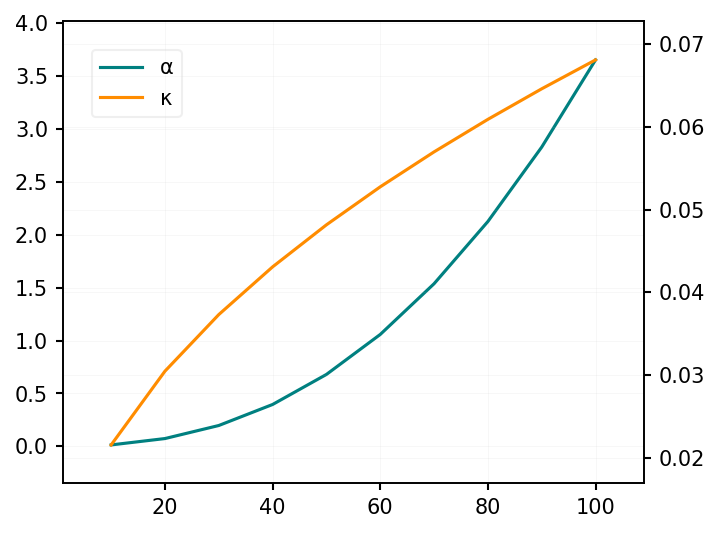

In [27]:
Trange = np.linspace(10,100,10)
df = pd.DataFrame(index = Trange)
for T in np.linspace(10, 100, 10):
    df.loc[T, "alpha"], df.loc[T, "kappa"] = get_alpha_kappa(T0 = T, n0 = 1e19, B = 0.5, Z = 1, lambda_n = 0.03)
    
fig, ax = plt.subplots(dpi = 150, figsize = (5,4))
ax2 = ax.twinx()
ax.plot(df.index, df["alpha"], label = r"$\alpha$")
ax2.plot(df.index, df["kappa"], label = r"$\kappa$", c = "darkorange")
fig.legend(loc = "upper left", bbox_to_anchor = (0.15,0.85))